<a href="https://colab.research.google.com/github/Ke-Pa-Sa/ProjectML_phase_detection/blob/main/ProjectML_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecting phase transitions using Self Supervised Learning

In [9]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import TensorDataset, random_split, DataLoader

In [10]:
# The training file

file_path = "/spins_data_L64_modelIsing_N10_nT101_minT0.8_maxT3.8_1.csv"
# If taken from the GitHub page, this file is separated in two files and should be merged

df = pd.read_csv(file_path)
print(df['Temperature'])

0       0.8
1       0.8
2       0.8
3       0.8
4       0.8
       ... 
1005    3.8
1006    3.8
1007    3.8
1008    3.8
1009    3.8
Name: Temperature, Length: 1010, dtype: float64


In [11]:
# Testing file

file_path_t = "/spins_data_L64_modelIsing_N30_nT61_minT1.5_maxT3.5_1.csv"

df_t = pd.read_csv(file_path_t)

print(df_t['Temperature'])

0       1.5
1       1.5
2       1.5
3       1.5
4       1.5
       ... 
1825    3.5
1826    3.5
1827    3.5
1828    3.5
1829    3.5
Name: Temperature, Length: 1830, dtype: float64


In [12]:
# Regular expression pattern to match the parts of the filename
pattern = r"spins_data_L(?P<L>\d+)_model(?P<model>\w+)_N(?P<N>\d+)_nT(?P<nT>\d+)"

# Search for the pattern in the filename
match = re.search(pattern, file_path)

match_t = re.search(pattern, file_path_t)

# Get the parameters of the spin configurations from the name of the file
if match:
    L = int(match.group('L'))
    model = match.group('model')
    N = int(match.group('N'))
    nT = int(match.group('nT'))
    print(f"L: {L}, model: {model}, N: {N}, nT: {nT}")
else:
    print("Pattern not found in the filename.")

if match_t:
    L_t = int(match_t.group('L'))
    model_t = match_t.group('model')
    N_t = int(match_t.group('N'))
    nT_t = int(match_t.group('nT'))
    print(f"L_t: {L_t}, model_t: {model_t}, N_t: {N_t}, nT_t: {nT_t}")
else:
    print("Pattern not found in the filename.")


L: 64, model: Ising, N: 10, nT: 101
L_t: 64, model_t: Ising, N_t: 30, nT_t: 61


In [13]:
# Reshape the spin configuration into matricies to use as inputs in CNN

df['Spins'] = df['Spins'].apply(lambda x: np.reshape(list(map(float, x.split(' '))), (L,L)))
df_t['Spins'] = df_t['Spins'].apply(lambda x: np.reshape(list(map(float, x.split(' '))), (L,L)))


In [14]:
print(df['Spins'])
print(df_t['Spins'])

0       [[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...
1       [[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...
2       [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...
3       [[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...
4       [[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...
                              ...                        
1005    [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0...
1006    [[1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0,...
1007    [[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0...
1008    [[1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -...
1009    [[1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0,...
Name: Spins, Length: 1010, dtype: object
0       [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...
1       [[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...
2       [[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...
3       [[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1....
4       [[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...
                              .

In [16]:
#Plotting the spin configurations, each row corresponds to a temperature

fig, axes = plt.subplots(nT, N, figsize=(int(N*5), int(nT*5)))

for i, spin in enumerate(df['Spins']):
    spin_config = np.reshape(spin, (L, L))

    axes[i//N,i%N].imshow(spin_config, cmap='coolwarm', interpolation='nearest')
    T = df["Temperature"][i]
    axes[i//N,i%N].set_title(f"Temperature {T}")
    axes[i//N,i%N].axis('off') # Optionally, hide the axis


In [17]:
fig, axes = plt.subplots(nT_t, N_t, figsize=(int(N_t*5), int(nT_t*5)))



for i, spin in enumerate(df_t['Spins']):
    spin_config = np.reshape(spin, (L_t, L_t))

    axes[i//N_t,i%N_t].imshow(spin_config, cmap='coolwarm', interpolation='nearest')
    T = df_t["Temperature"][i]
    axes[i//N_t,i%N_t].set_title(f"Temperature {T}")
    axes[i//N_t,i%N_t].axis('off') # Optionally, hide the axis


This first part splits the training data into two regions and defines the CNN.

The training is visualised by seeing the temperature prediction given a spin configuration of a given temperature.

In [18]:
torch.manual_seed(42)
x= 2.1
filtered_df = df[((df['Temperature'] > x-1.1) & (df['Temperature'] < x-0.3)) | ((df['Temperature'] > x+0.3) & (df['Temperature'] < x+1.1))]
print(filtered_df["Temperature"])

X = torch.tensor(filtered_df['Temperature'].values, dtype=torch.float)
y = torch.stack([torch.tensor(spin_sequence, dtype=torch.float) for spin_sequence in filtered_df['Spins'].values]).unsqueeze(1)
dataset = TensorDataset(X, y)

X_t = torch.tensor(df_t['Temperature'].values, dtype=torch.float)
y_t = torch.stack([torch.tensor(spin_sequence, dtype=torch.float) for spin_sequence in df_t['Spins'].values]).unsqueeze(1)
dataset_t = TensorDataset(X_t, y_t)

70     1.01
71     1.01
72     1.01
73     1.01
74     1.01
       ... 
795    3.17
796    3.17
797    3.17
798    3.17
799    3.17
Name: Temperature, Length: 530, dtype: float64


In [19]:
# 80% for training, 20% for testing
train_ratio = 0.8

# Calculate the number of samples for training and testing
num_samples = len(dataset)
num_train = int(train_ratio * num_samples)
num_test = num_samples - num_train

print(num_train, num_test)

# Split the dataset
torch.manual_seed(42)
train_dataset, test_dataset = random_split(dataset, [num_train, num_test])

424 106


In [20]:
print(dataset[3][1].shape)
# channel, dimentions

torch.Size([1, 64, 64])


In [21]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary

In [22]:
# Definition of the CNN

class CNN_1(nn.Module):
    def __init__(self):
        super(CNN_1, self).__init__()
        self.forward1 = nn.Sequential(
            nn.Conv2d(1, 4, kernel_size=(3,3), stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2)),
            nn.Conv2d(4, 16, kernel_size=(3,3), stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2)),
            nn.Conv2d(16, 32, kernel_size=(3,3), stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2)),
            nn.Conv2d(32, 64, kernel_size=(3,3), stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2)),
            nn.Flatten(),
            nn.Linear(64*4*4, 512),
            nn.ReLU(),
            nn.Linear(512, 64),
            nn.ReLU(),
            nn.Linear(64, 16),
            nn.ReLU(),
            nn.Linear(16,1)
        )

    def forward(self, x):
        x = self.forward1(x)
        return x

# PyTorch models inherit from torch.nn.Module
class NN_1(nn.Module):
    def __init__(self):
        super(NN_1, self).__init__()
        self.forward1 = nn.Sequential(
            nn.Flatten(),
            nn.Linear(L**2, 16000),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(16000, 4000),
            nn.ReLU(),
            nn.Linear(4000, 2000),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(2000, 1000),
            nn.ReLU(),
            nn.Linear(1000,200),
            nn.Dropout(0.5),
            nn.Linear(200, 20),
            nn.ReLU(),
            nn.Linear(20,1)
        )

    def forward(self, x):
        x = self.forward1(x)
        return x


In [33]:
model = CNN_1()
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.006, momentum=0.9, dampening=0.0, weight_decay=0, nesterov=False)

summary(model, input_size=(1, L, L))

batch_size = 8
trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

for batch_idx, (temperatures, spin_configs) in enumerate(trainloader):
    print(f"Batch {batch_idx}:")
    print(f"Temperatures shape: {temperatures.shape}")
    print(f"Spin Configurations shape: {spin_configs.shape}")
    break

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 64, 64]              40
              ReLU-2            [-1, 4, 64, 64]               0
         MaxPool2d-3            [-1, 4, 32, 32]               0
            Conv2d-4           [-1, 16, 32, 32]             592
              ReLU-5           [-1, 16, 32, 32]               0
         MaxPool2d-6           [-1, 16, 16, 16]               0
            Conv2d-7           [-1, 32, 16, 16]           4,640
              ReLU-8           [-1, 32, 16, 16]               0
         MaxPool2d-9             [-1, 32, 8, 8]               0
           Conv2d-10             [-1, 64, 8, 8]          18,496
             ReLU-11             [-1, 64, 8, 8]               0
        MaxPool2d-12             [-1, 64, 4, 4]               0
          Flatten-13                 [-1, 1024]               0
           Linear-14                  [

We train the model

tensor(5.9659, grad_fn=<MeanBackward0>)
tensor(4.9760, grad_fn=<MeanBackward0>)
tensor(3.6917, grad_fn=<MeanBackward0>)
tensor(3.4612, grad_fn=<MeanBackward0>)
tensor(4.2532, grad_fn=<MeanBackward0>)
tensor(3.3936, grad_fn=<MeanBackward0>)
tensor(1.9704, grad_fn=<MeanBackward0>)
tensor(2.8196, grad_fn=<MeanBackward0>)
tensor(1.1203, grad_fn=<MeanBackward0>)
tensor(1.5866, grad_fn=<MeanBackward0>)
tensor(2.1863, grad_fn=<MeanBackward0>)
tensor(1.3277, grad_fn=<MeanBackward0>)
tensor(0.9052, grad_fn=<MeanBackward0>)
tensor(0.9264, grad_fn=<MeanBackward0>)
tensor(0.7163, grad_fn=<MeanBackward0>)
tensor(0.5594, grad_fn=<MeanBackward0>)
tensor(0.4161, grad_fn=<MeanBackward0>)
tensor(0.6503, grad_fn=<MeanBackward0>)
tensor(0.5564, grad_fn=<MeanBackward0>)
tensor(0.5723, grad_fn=<MeanBackward0>)
tensor(0.9379, grad_fn=<MeanBackward0>)
tensor(0.9799, grad_fn=<MeanBackward0>)
tensor(1.0259, grad_fn=<MeanBackward0>)
tensor(0.7689, grad_fn=<MeanBackward0>)
tensor(0.8501, grad_fn=<MeanBackward0>)


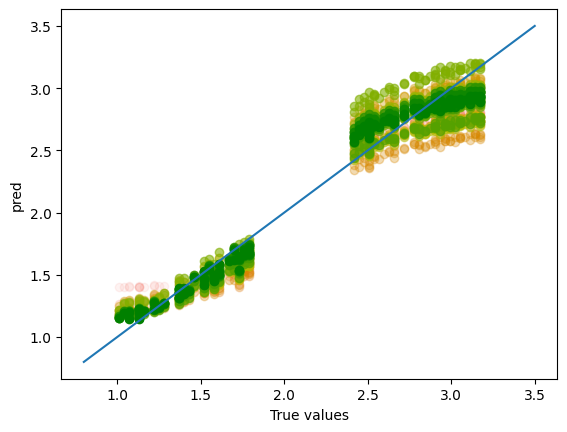

In [34]:
n_epochs = 20

y_pred_list = []
labels_list = []

fig, ax = plt.subplots()

# target
ax.plot(np.linspace(0.8,3.5,1001),np.linspace(0.8,3.5,1001))

# Illustration of the training
from colour import Color
red = Color("red")
colors = list(red.range_to(Color("green"),n_epochs))

for epoch in range(n_epochs):
    for labels, inputs in trainloader:
        # forward, backward, and then weight update

        y_pred = model(inputs)
        loss = loss_fn(y_pred.squeeze(), labels)

        print(torch.mean((y_pred.squeeze() - labels)**2))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    mse = 0
    count = 0
    for labels, inputs in testloader:
        y_pred = model(inputs)
        mse += torch.mean((y_pred.squeeze() - labels)**2)
        count += len(labels)
        y_pred_list.extend(y_pred.squeeze().tolist()) # Convert to list and add to y_pred_list
        labels_list.extend(labels.tolist()) # Convert to list and add to labels_list

    mse /= count
    print("Epoch %d: model mean square error %.10f" % (epoch, mse))

    ax.scatter(labels_list, y_pred_list, alpha = epoch/n_epochs, c=str(colors[int(epoch)]))
    ax.set_xlabel('True values')
    ax.set_ylabel('pred')
    y_pred_list.clear()
    labels_list.clear()


We test the CNN on the test data, the obtain the MSE and the Standard deviation and compare it to the theoretical transition temperature we expect

In [35]:
testloader_t = DataLoader(dataset_t, batch_size=N_t, shuffle=False)

y_pred_list_t = []
labels_list_t = []
mse_t = []
std_t = []
count_t = 0
for labels, inputs in testloader_t:
        y_pred = model(inputs)
        mse_t.append(torch.mean((y_pred.squeeze() - labels)**2).item())
        std_t.append(torch.std(y_pred.squeeze()).item())
        count += len(labels)
        y_pred_list_t.extend(y_pred.squeeze().tolist()) # Convert to list and add to y_pred_list
        labels_list_t.extend(labels.tolist()) # Convert to list and add to labels_list


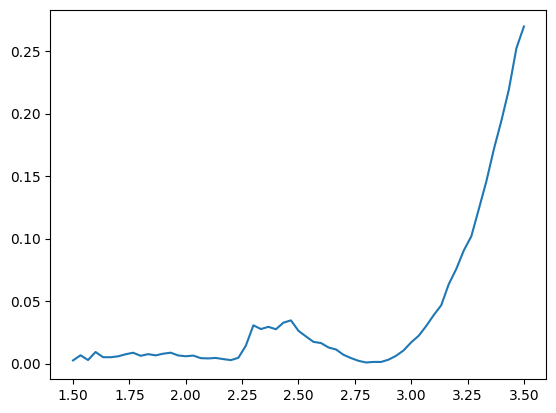

In [36]:
fig, ax = plt.subplots()
labels_subset = labels_list_t[::N_t]
ax.plot(labels_subset, mse_t)

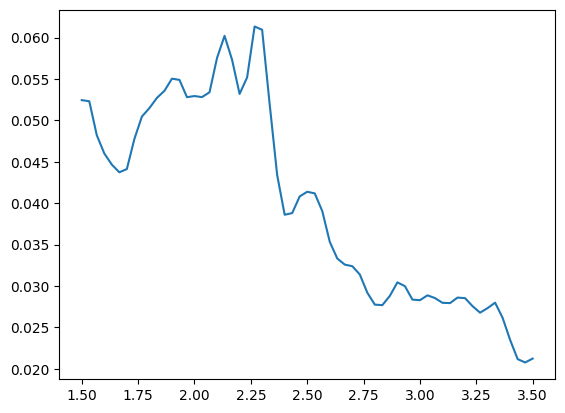

In [39]:
from scipy.ndimage import gaussian_filter

# Smoothed std

fig, ax = plt.subplots()
labels_subset = labels_list_t[::N_t]
ax.plot(labels_subset, gaussian_filter(std_t, 1))

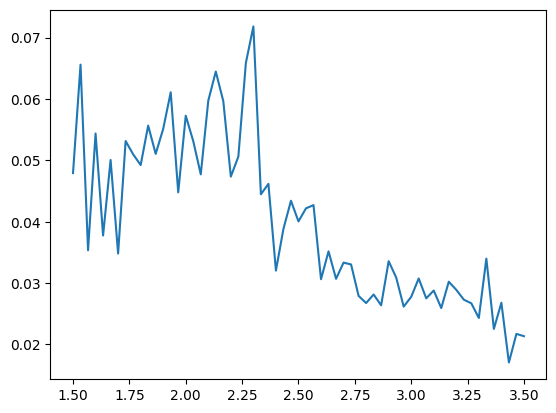

In [40]:
fig, ax = plt.subplots()

# Non smoothed std

labels_subset = labels_list_t[::N_t]
ax.plot(labels_subset, std_t)

Now that we observe a peak around 2.26 we create a function to obtain the std so we can loop through this function while shifting the training region

In [41]:
def get_std(lo_mid, hi_mid, inter_length, df = df, batch_size = batch_size, n_epochs = n_epochs):

    # This function essentially reuses the previous code

    filtered_df = df[((df['Temperature'] > lo_mid-inter_length/2) & (df['Temperature'] < lo_mid+inter_length/2)) | ((df['Temperature'] > hi_mid-inter_length/2) & (df['Temperature'] < hi_mid+inter_length/2))]

    X = torch.tensor(filtered_df['Temperature'].values, dtype=torch.float)
    y = torch.stack([torch.tensor(spin_sequence, dtype=torch.float) for spin_sequence in filtered_df['Spins'].values]).unsqueeze(1)
    dataset = TensorDataset(X, y)

    X_t = torch.tensor(df_t['Temperature'].values, dtype=torch.float)
    y_t = torch.stack([torch.tensor(spin_sequence, dtype=torch.float) for spin_sequence in df_t['Spins'].values]).unsqueeze(1)
    dataset_t = TensorDataset(X_t, y_t)

    train_ratio = 0.8

    # Calculate the number of samples for training and testing
    num_samples = len(dataset)
    num_train = int(train_ratio * num_samples)
    num_test = num_samples - num_train

    # Split the dataset

    train_dataset, test_dataset = random_split(dataset, [num_train, num_test])

    model = CNN_1()
    loss_fn = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.006, momentum=0.9, dampening=0.0, weight_decay=0, nesterov=False)

    batch_size = 8
    trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    testloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

    for epoch in range(n_epochs):
        for labels, inputs in trainloader:
            # forward, backward, and then weight update
            y_pred = model(inputs)
            loss = loss_fn(y_pred.squeeze(), labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    testloader_t = DataLoader(dataset_t, batch_size=N_t, shuffle=False)

    y_pred_list_t = []
    labels_list_t = []
    mse_t = []
    std_t = []
    count_t = 0
    for labels, inputs in testloader_t:
            y_pred = model(inputs)
            mse_t.append(torch.mean((y_pred.squeeze() - labels)**2).item())
            std_t.append(torch.std(y_pred.squeeze()).item())
            count_t += len(labels)
            y_pred_list_t.extend(y_pred.squeeze().tolist()) # Convert to list and add to y_pred_list
            labels_list_t.extend(labels.tolist()) # Convert to list and add to labels_list
    return std_t

We test this function in the same region as before

In [42]:
test_std = get_std(1.7, 3.1, 0.8, n_epochs = 20)

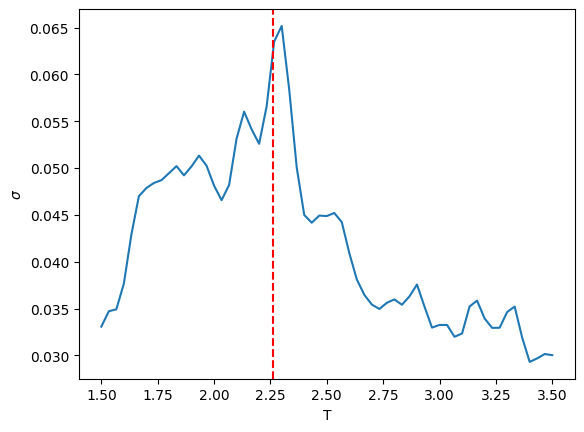

In [43]:
fig, ax = plt.subplots()
labels_subset = labels_list_t[::N_t]
ax.plot(labels_subset, gaussian_filter(test_std, 1))
ax.set_xlabel('T')
ax.set_ylabel('$\sigma$')
ax.axvline(x=2.26, color='r', linestyle='--')

In [ ]:
idx_range = np.where((np.array(labels_subset) > 1.75) & (np.array(labels_subset) < 2.25))[0]
print(test_std[idx_range[0]:idx_range[-1]])
print(np.max(test_std[idx_range[0]:idx_range[-1]]))

[0.05521827191114426, 0.05875643342733383, 0.06253395974636078, 0.061976153403520584, 0.05280061438679695, 0.06401309370994568, 0.05010513588786125, 0.06316076964139938, 0.057223934680223465, 0.046744368970394135, 0.0597560852766037, 0.06491774320602417, 0.06131785362958908, 0.04218261316418648]
0.06491774320602417


We now loop through the function while shifting the training region

In [45]:
n_plots = 16
n_epochs = 20
tc = 2.26
train_range = 0.8
test_range = 0.6
low_low = tc-(train_range+test_range)/2-test_range/2
low_hi = tc+(train_range+test_range)/2-test_range/2


In [51]:
stds = [get_std(low_low+i, low_hi+i, train_range, n_epochs=n_epochs) for i in np.linspace(0, test_range, n_plots)]


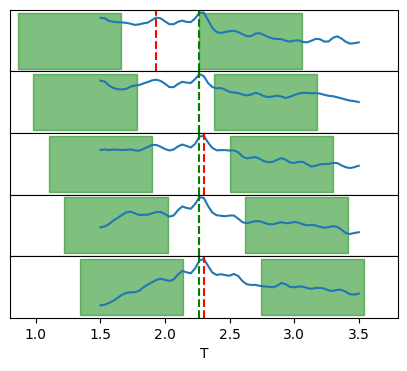

In [52]:
train_region = [(low_low+i, low_hi+i, train_range) for i in np.linspace(0, test_range, n_plots)]

labels_subset = labels_list_t[::N_t]

# We just use a subset of the std to illustrate
std_plot = [stds[0], stds[3], stds[7], stds[11], stds[-1]]
fig, axs = plt.subplots(len(std_plot), 1, figsize=(5, 0.8 * len(std_plot)))

for i, std in enumerate(std_plot):
    std = gaussian_filter(std, 1)
    x_1, x_2, width = train_region[3*i]
    axs[i].fill_betweenx([0, max(std)], x_1-width/2, x_1+width/2, color='green', alpha=0.5)
    axs[i].fill_betweenx([0, max(std)], x_2-width/2, x_2+width/2, color='green', alpha=0.5)
    axs[i].plot(labels_subset, std)
    axs[i].set_xlim(0.8, 3.8)
    axs[i].set_yticks([])

    idx_range = np.where((np.array(labels_subset) > x_1+width/2) & (np.array(labels_subset) < x_2-width/2))[0]
    max_std = np.max(std[idx_range[0]:idx_range[-1]])
    Tc = labels_subset[np.where(std == max_std)[0][0]]
    axs[i].axvline(x=Tc, color='r', linestyle='--')
    axs[i].axvline(x=2.26, color='g', linestyle='--')

axs[i].set_xlabel('T')

plt.subplots_adjust(hspace=0)


Here we define the confidence function, this allows is to find the most probable transition temperature

In [53]:
def get_confidences(stds = stds, n_plots = n_plots, train_region = train_region):
    deltaW = train_region[1][0]-train_region[0][0]
    Tcs = []
    for i, std in enumerate(stds):
        x_1, x_2, width = train_region[i]
        idx_range = np.where((np.array(labels_subset) > x_1+width/2) & (np.array(labels_subset) < x_2-width/2))[0]
        max_std = np.max(std[idx_range[0]:idx_range[-1]])
        Tcs.append(labels_subset[np.where(std == max_std)[0][0]])
    n_half = n_plots//2
    j = 0
    confidences = []
    while j+n_half<=n_plots:
        Tcs_now = torch.tensor(Tcs[j:j+n_half].copy())
        std_of_Tcs  = torch.std(Tcs_now, correction = 0)
        confidences.append((1-std_of_Tcs/torch.sqrt(std_of_Tcs**2+deltaW**2), torch.mean(Tcs_now)))
        j += 1
    return confidences

In [54]:
C = get_confidences()
conf = [item[0].numpy() for item in C]
Tc_conf = [item[1].numpy() for item in C]

Max confidence score: 1.0
Most probable transition temperature: 2.3


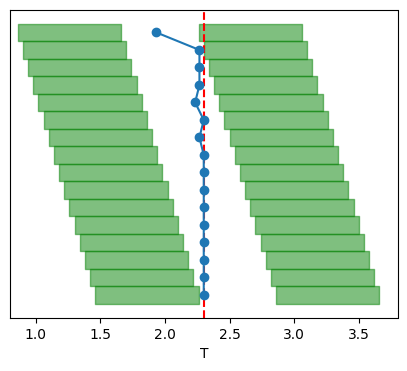

In [55]:
train_region = [(low_low+i, low_hi+i, train_range) for i in np.linspace(0, test_range, n_plots)]

#print(train_region)
labels_subset = labels_list_t[::N_t]
#print(labels_subset)

Tcs = []
fig, axs = plt.subplots(1, 1, figsize=(5,4))
for i, std in enumerate(stds):
    x_1, x_2, width = train_region[i]
    axs.fill_betweenx([0-i, -1-i], x_1-width/2, x_1+width/2, color='green', alpha=0.5)
    axs.fill_betweenx([0-i, -1-i], x_2-width/2, x_2+width/2, color='green', alpha=0.5)
    axs.set_xlim(0.8, 3.8)
    axs.set_yticks([])

    idx_range = np.where((np.array(labels_subset) > x_1+width/2) & (np.array(labels_subset) < x_2-width/2))[0]
    max_std = np.max(std[idx_range[0]:idx_range[-1]])
    Tcs.append(labels_subset[np.where(std == max_std)[0][0]])

axs.axvline(x=Tc_conf[np.where(conf == np.max(conf))[0][0]], color='r', linestyle='--')
axs.plot(Tcs, -np.arange(len(Tcs))-0.5, marker='o')

print('Max confidence score:', np.max(conf))
print('Most probable transition temperature:', Tc_conf[np.where(conf == np.max(conf))[0][0]])

axs.set_xlabel('T')

plt.subplots_adjust(hspace=0)

The variation in the score that was presented during the examination is due to the random seed, the Confidence Score of 1 is unnaturally high which is most likely due to the resolution in temperature